In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
imdb_data = pd.read_csv('Data-Scientist-imdb_data_v2.csv')
imdb_data.head()

,id,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,priority,longest_facebook_comment_review_char,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,made_up_column,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,website_score,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,1,1102,67,18,1181,4,250,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,7.6,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,7.9,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9
1,2,1117,70,18,1196,4,740,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,7.2,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,7.1,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1
2,3,1000,90,11,1125,4,1779,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,7.6,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,6.8,245000000.0,244999000,2015.0,393.0,2.35,85000,6.8
3,4,1007,35,10,1127,4,1074,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,7.8,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,8.5,250000000.0,249999000,2012.0,23000.0,2.35,164000,8.5
4,5,1128,85,20,1072,4,813,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,4.7,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1,NaN,-1000,NaN,12.0,NaN,0,7.1


### Check the Duplicate Values

In [4]:
imdb_data_duplicates=imdb_data[imdb_data.duplicated()]
# print('Duplicate data except their first appereance are:')
# imdb_data_duplicates

In [5]:
len(imdb_data_duplicates)

744

Lets Remove the Duplicate Values

In [6]:
imdb_data.drop_duplicates(keep='first', inplace=True)
imdb_data.shape

(5043, 38)

### Column 'Genre' can be Splitted. So, lets work on this:

In [7]:
### Split the column by delimiter (|)
imdb_data['Genres_1'] = imdb_data['genres'].str.split('|').str[0]
imdb_data['Genres_2'] = imdb_data['genres'].str.split('|').str[1]

### Remove the Un-necessary columns

Here, the columns 'website_score' and 'imdb_score' has the same values. Lets confirm this

In [8]:
imdb_data['check']= imdb_data['website_score'] == imdb_data['imdb_score']
imdb_data['check'].value_counts()

True    5043
Name: check, dtype: int64

Since the columns 'website_score' and imdb_score has the same values, we can drop 'website_score' column

In [9]:
imdb_data['priority'].unique()

array([4], dtype=int64)

The column 'priority' has the same value for all the observations, so we can drop this columns also. Beside this, other variables like 'id', 'movie_imdb_link', 'plot_keywords' can also be dropped

In [10]:
imdb_data = imdb_data.drop(['id','priority','movie_imdb_link','genres','plot_keywords','website_score', 'check', 'actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)

In [11]:
imdb_data['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [12]:
imdb_data['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [13]:
imdb_data['director_name'].nunique()

2398

In [14]:
imdb_data['movie_title'].nunique()

4917

In [15]:
imdb_data['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [16]:
imdb_data = imdb_data.drop(['language', 'country', 'director_name', 'movie_title', 'content_rating' ], axis=1)

In [17]:
imdb_data.head()

,stock_market_idx,days_since_last_tweet,pre_screen_viewers,characters_per_longest_review,longest_facebook_comment_review_char,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,made_up_column,facenumber_in_poster,num_user_for_reviews,budget,weighted_budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,Genres_1,Genres_2
0,1102,67,18,1181,250,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,7.6,0.0,3054.0,237000000.0,236999000,2009.0,936.0,1.78,33000,7.9,Action,Adventure
1,1117,70,18,1196,740,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,7.2,0.0,1238.0,300000000.0,299999000,2007.0,5000.0,2.35,0,7.1,Action,Adventure
2,1000,90,11,1125,1779,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,7.6,1.0,994.0,245000000.0,244999000,2015.0,393.0,2.35,85000,6.8,Action,Adventure
3,1007,35,10,1127,1074,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,7.8,0.0,2701.0,250000000.0,249999000,2012.0,23000.0,2.35,164000,8.5,Action,Thriller
4,1128,85,20,1072,813,NaN,NaN,NaN,131.0,NaN,131.0,NaN,8,143,4.7,0.0,NaN,NaN,-1000,NaN,12.0,NaN,0,7.1,Documentary,NaN


In [18]:
imdb_data.shape

(5043, 26)

### Check Missing Values

In [19]:
total = imdb_data.isnull().sum().sort_values(ascending=False)
percent_1 = imdb_data.isnull().sum()/imdb_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'],sort=False)
missing_data.head(26)

,Total,%
gross,884,17.5
Genres_2,633,12.6
budget,492,9.8
aspect_ratio,329,6.5
title_year,108,2.1
director_facebook_likes,104,2.1
num_critic_for_reviews,50,1.0
actor_3_facebook_likes,23,0.5
num_user_for_reviews,21,0.4
color,19,0.4


Text(0.5, 1.0, 'Missing  Data In The Dataset')

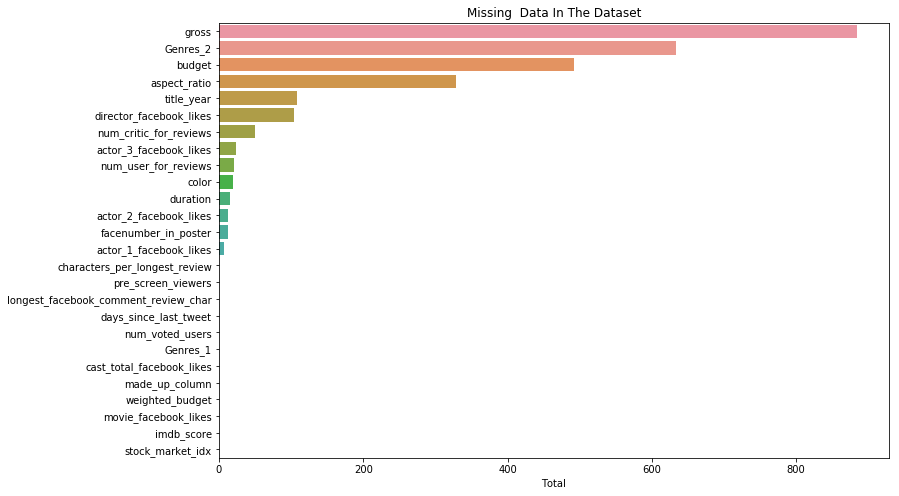

In [20]:
#THIS IS THE VISUAL  TO SHOW THE MISSING DATA IN OUR DATASET 
plt.figure(figsize=(12, 8))
sns.barplot(missing_data['Total'],missing_data.index)
plt.title('Missing  Data In The Dataset')

From above table and barplot, we can observe the percentage of missing values. None of the variables has percentage of missing values more than 20 %.

So, we can either remove all the missing variables or impute the missing variables with relevant values.

### Remove Missing Values

Column "Title_Year"

In [21]:
imdb_data['title_year'].sort_values().unique()

array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2045.,   nan])

Here, we can see that the year 2045 AD is yet to come. So, we need to remove the rows with 'title_year' == 2045 and 'title_year'== nan.

In [22]:
imdb_data = imdb_data[(imdb_data.title_year != 2045.)]
#imdb_data = imdb_data['title_year'].dropna()
imdb_data = imdb_data[pd.notnull(imdb_data['title_year'])]

In [23]:
imdb_data['title_year'].sort_values().unique()

array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Column 'Color'

In [24]:
imdb_data = imdb_data[pd.notnull(imdb_data['color'])]

Column "Genres_2"

In [25]:
imdb_data = imdb_data[pd.notnull(imdb_data['Genres_2'])]

Column 'gross'

In [26]:
imdb_data = imdb_data[pd.notnull(imdb_data['gross'])]

Column "Actor 1 facebook like"

In [27]:
imdb_data = imdb_data[pd.notnull(imdb_data['actor_1_facebook_likes'])]

### Check Outliers

Column 'imdb_score'

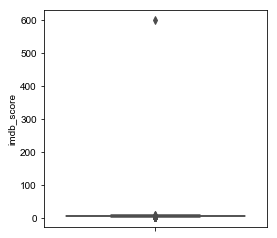

In [28]:
plt.subplots(figsize=(4, 4))
sns.set(style="whitegrid")
ax = sns.boxplot(y=imdb_data["imdb_score"])

The "IMDB_Score" values varie from 0 to 10. Here, an outlier is detected.

Lets remove this outlier

In [29]:
imdb_data =imdb_data[(imdb_data['imdb_score']<= 10)]

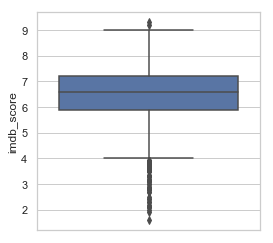

In [30]:
plt.subplots(figsize=(4,4))
sns.set(style="whitegrid")
ax = sns.boxplot(y=imdb_data["imdb_score"])

### Impute the Missing Values

Lets make box plot diagram for the variables that still have missing varibales

In [31]:
 # imdb_data.isnull().sum()

In [32]:
box_plot_data = imdb_data[['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'aspect_ratio',  ]]

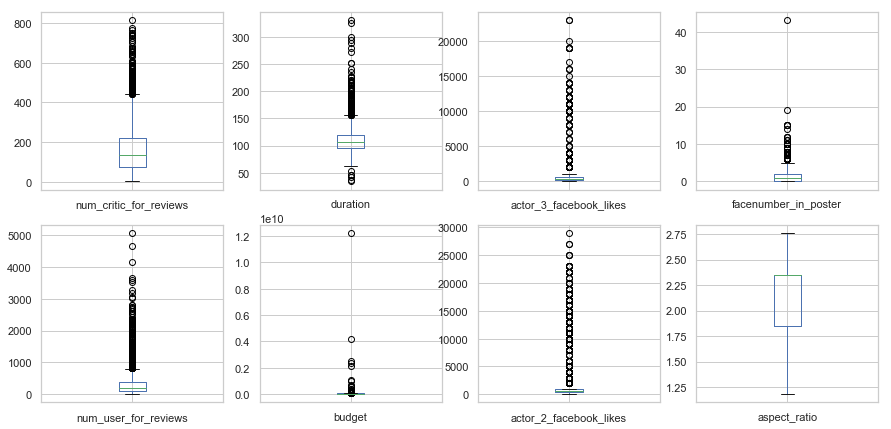

In [33]:
box_plot_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

Imputation by MEAN

In [34]:
imdb_data['aspect_ratio'].fillna(imdb_data['aspect_ratio'].mean(), inplace = True)

Impute by Median

In [35]:
imdb_data['num_critic_for_reviews'].fillna(imdb_data['num_critic_for_reviews'].median(), inplace = True)

In [36]:
imdb_data['duration'].fillna(imdb_data['duration'].median(), inplace = True)

In [37]:
imdb_data['actor_3_facebook_likes'].fillna(imdb_data['actor_3_facebook_likes'].median(), inplace = True)

In [38]:
imdb_data['facenumber_in_poster'].fillna(imdb_data['facenumber_in_poster'].median(), inplace = True)

In [39]:
imdb_data['num_user_for_reviews'].fillna(imdb_data['num_user_for_reviews'].median(), inplace = True)

In [40]:
imdb_data['budget'].fillna(imdb_data['budget'].median(), inplace = True)

In [41]:
imdb_data['actor_2_facebook_likes'].fillna(imdb_data['actor_2_facebook_likes'].median(), inplace = True)

### Lets give a different  name to the data, which may be used for visualization later

In [42]:
visualization_data = imdb_data    ### only for the purpose of visualization later

### Label Encoding and One Hot Encoding

Label Encoding

In [43]:
imdb_data['color'].unique()

array(['Color', ' Black and White'], dtype=object)

In [44]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

imdb_data['color']= label_encoder.fit_transform(imdb_data['color'])

In [45]:
imdb_data['color'].unique()

array([1, 0], dtype=int64)

One Hot Encoding

In [46]:
#from sklearn.preprocessing import OneHotEncoder 

In [47]:
imdb_data = pd.get_dummies(imdb_data, columns = ['Genres_1', 'Genres_2'], prefix = [ 'Genres_1', 'Genres_2'])

In [48]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704 entries, 0 to 5041
Data columns (total 59 columns):
stock_market_idx                        3704 non-null int64
days_since_last_tweet                   3704 non-null int64
pre_screen_viewers                      3704 non-null int64
characters_per_longest_review           3704 non-null int64
longest_facebook_comment_review_char    3704 non-null int64
color                                   3704 non-null int32
num_critic_for_reviews                  3704 non-null float64
duration                                3704 non-null float64
director_facebook_likes                 3704 non-null float64
actor_3_facebook_likes                  3704 non-null float64
actor_1_facebook_likes                  3704 non-null float64
gross                                   3704 non-null float64
num_voted_users                         3704 non-null int64
cast_total_facebook_likes               3704 non-null int64
made_up_column                          3

In [49]:
imdb_data.rename(columns={'Genres_1_Sci-Fi':'Genres_1_Sci_Fi',
                          'Genres_2_Sci-Fi':'Genres_2_Sci_Fi'},
                         inplace=True)

## Visualization

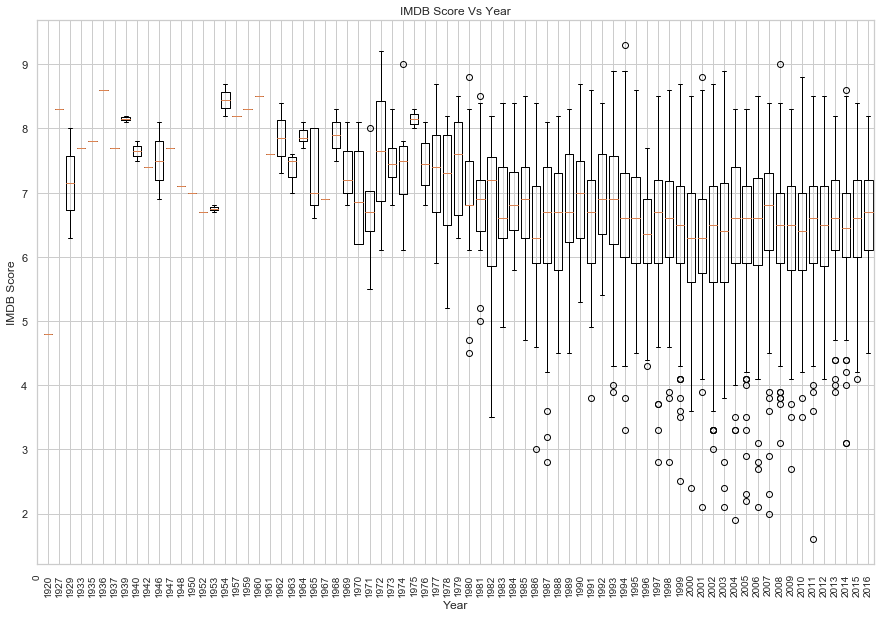

In [50]:

year=(imdb_data.title_year.unique()).astype(int)
year=sorted(year)

yearImdbScore=[]
numOfMovieByYear=[]
for i in year:
    tmp=imdb_data.imdb_score[imdb_data.title_year==i]
    yearImdbScore.append(tmp)
    numOfMovieByYear.append(len(tmp))


#plt.figure(2)
plt.figure(figsize=(15,10))
plt.title("IMDB Score Vs Year")
plt.ylabel("IMDB Score")
plt.xlabel('Year')
plt.boxplot(yearImdbScore,widths=.75)
year=list(np.insert(year,0,0))
plt.xticks(range(len(year)),year,rotation=90,fontsize=10)
plt.show()

From the Box Plot between IMDB Score and Year, we can see that the IMDB score variation range was small during the earlier time period. While in the recents years ( last 30 - 40 Years), the range of variation is bigger comared to earlier time period.

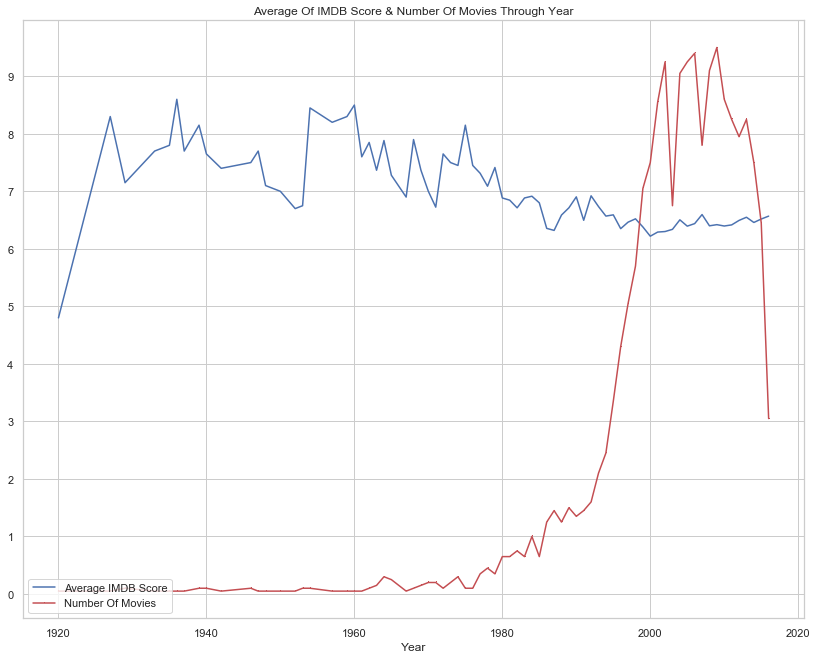

In [51]:
del(year[0])

avgimdbScore=[sum(i)/len(i) for i in yearImdbScore]
convertedNumMovie=[i/float(20) for i in numOfMovieByYear]

plt.figure(figsize=(14,11))
plt.title("Average Of IMDB Score & Number Of Movies Through Year")
plt.xlabel('Year')


plt.plot(year,avgimdbScore)
plt.plot(year,convertedNumMovie,',r-')
plt.legend(['Average IMDB Score','Number Of Movies'],loc='lower left')
plt.yticks(range(10))
plt.show()

From the plot, it can be observed that the imdb_score still remained constant (literally) though the number of movies increased.

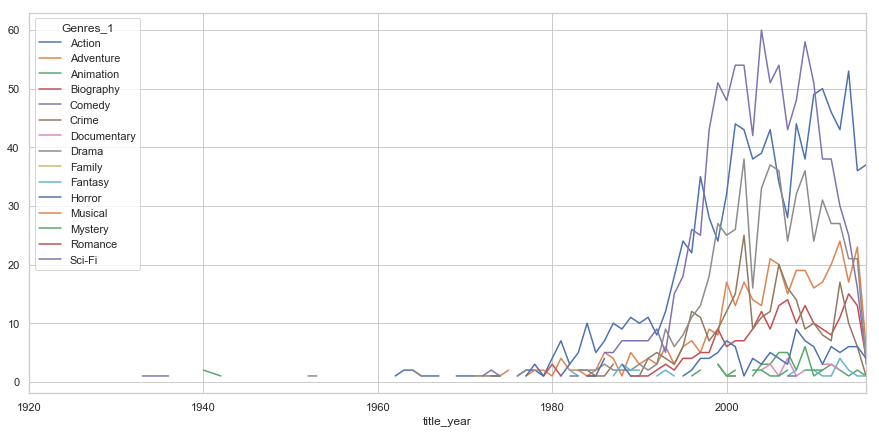

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
visualization_data.groupby(['title_year','Genres_1']).count()['Genres_2'].unstack().plot(ax=ax)

From the above plot, we can see that the number of 'Genres' has increased over the period of time

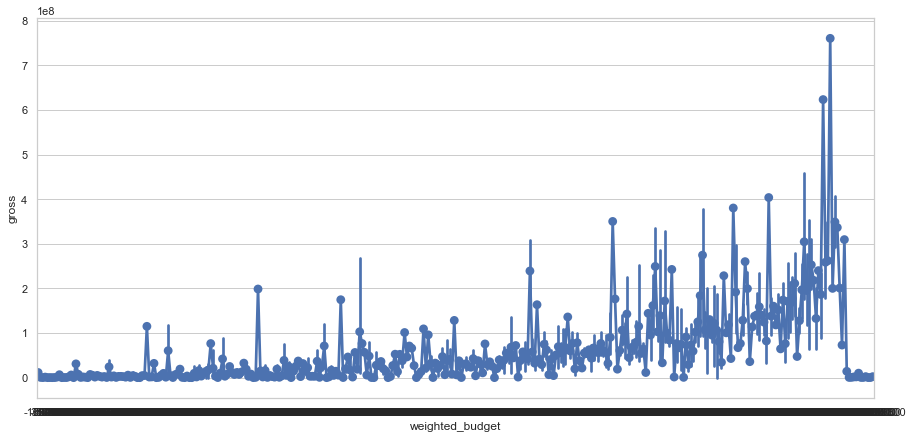

In [53]:
#Plot of budget and revenue

fig, ax = plt.subplots(figsize=(15,7))
sns.pointplot(x="weighted_budget", y="gross", data=imdb_data)

From the plot, we can see that the gross income over the period of time with correspondence to its weighted_budget

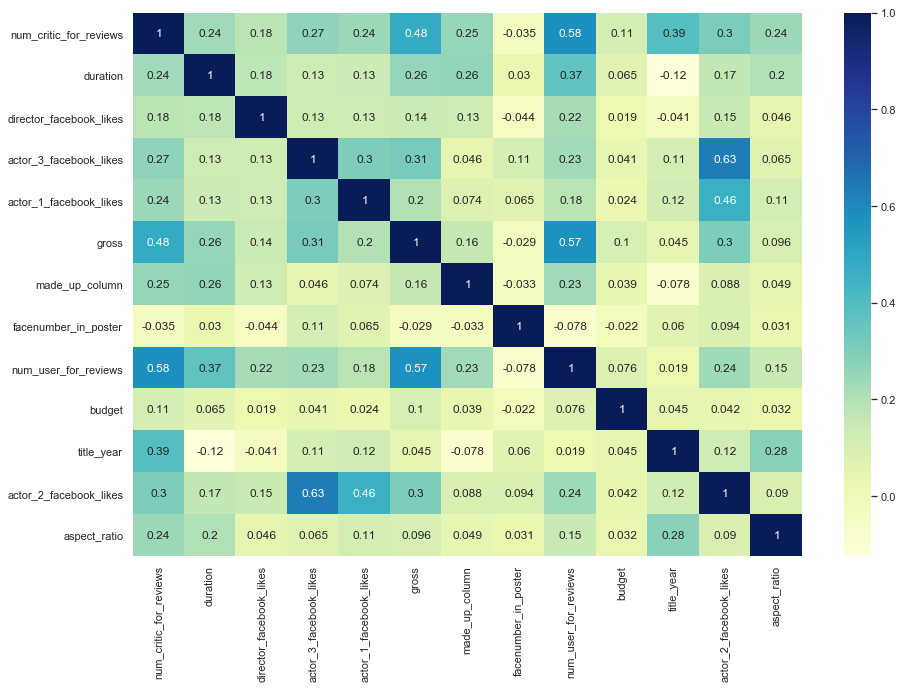

In [54]:
continuous_features = ['num_critic_for_reviews', 'duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
                       'gross','made_up_column','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes',
                       'aspect_ratio']
cont = imdb_data[continuous_features]
plt.subplots(figsize=(15, 10))
sns.heatmap(cont.corr(), annot=True, cmap="YlGnBu") ##cmap="RdYlGn" for red, yellow, and green
plt.show()

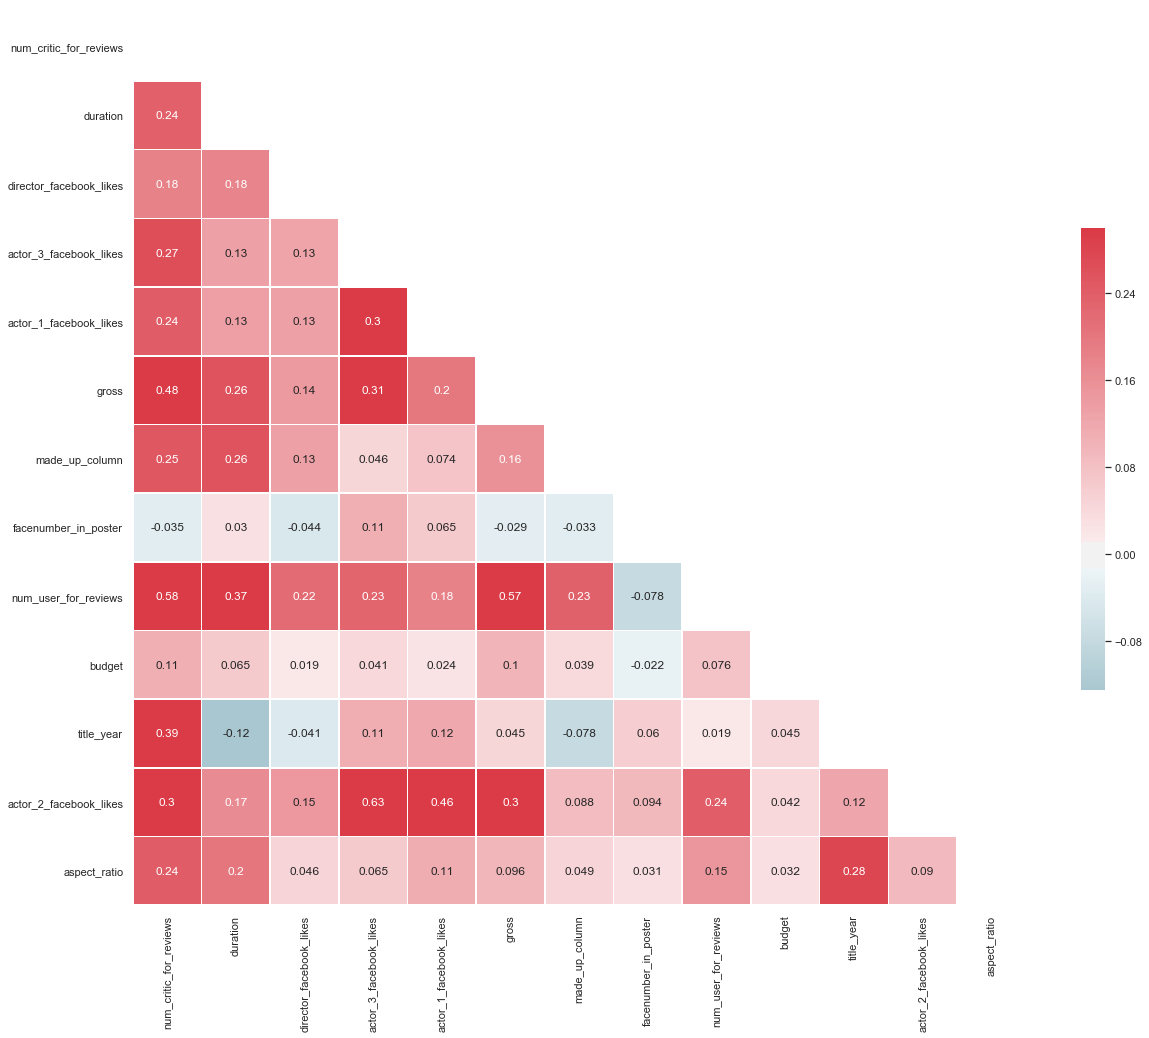

In [55]:
corr = cont.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 17))


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Pearson Correlation Coefficient values for all the variables are not significant.

Text(0.5, 1.0, 'Brief Correlation Graph of Features and imdb_score')

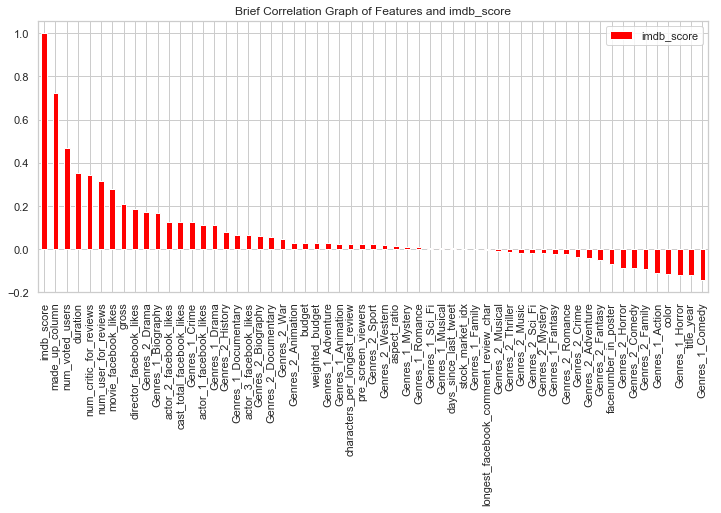

In [56]:
df1 = pd.DataFrame(imdb_data.corr()['imdb_score'].sort_values(ascending=False))
df1.plot(kind='bar', figsize =(12,5), color='red')
plt.title('Brief Correlation Graph of Features and imdb_score')

The above plots gives the correlation coefficient (slope) of the variables with the target variable 'imdb_score' 

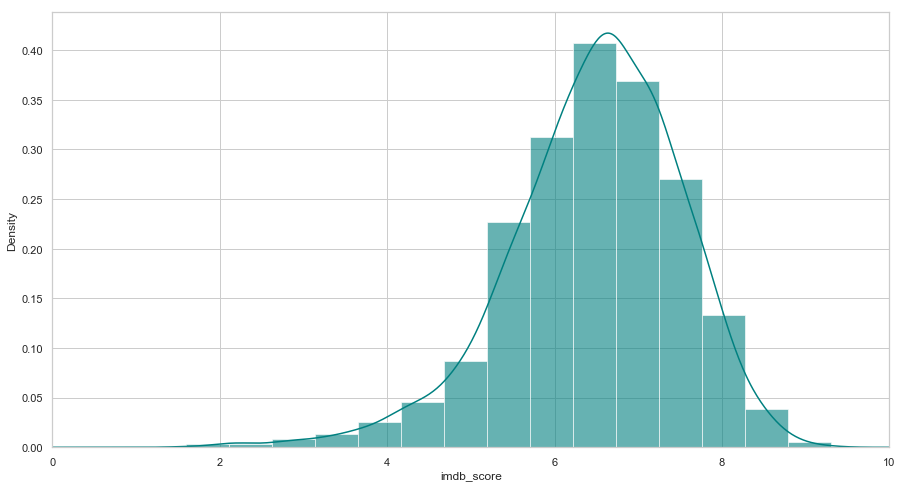

In [57]:
plt.figure(figsize=(15,8))
ax = imdb_data["imdb_score"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
imdb_data["imdb_score"].plot(kind='density', color='teal')
ax.set(xlabel='imdb_score')
plt.xlim(0, 10)
plt.show()

From the plot, the maximum values of 'imdb_score' falls around (6.5 -7).

## Train-Test Split

In [58]:
X = imdb_data[['stock_market_idx', 'days_since_last_tweet', 'pre_screen_viewers',
       'characters_per_longest_review', 'longest_facebook_comment_review_char',
       'color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'made_up_column', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'weighted_budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'Genres_1_Action', 'Genres_1_Adventure',
       'Genres_1_Animation', 'Genres_1_Biography', 'Genres_1_Comedy',
       'Genres_1_Crime', 'Genres_1_Documentary', 'Genres_1_Drama',
       'Genres_1_Family', 'Genres_1_Fantasy', 'Genres_1_Horror',
       'Genres_1_Musical', 'Genres_1_Mystery', 'Genres_1_Romance',
       'Genres_1_Sci_Fi', 'Genres_2_Adventure', 'Genres_2_Animation',
       'Genres_2_Biography', 'Genres_2_Comedy', 'Genres_2_Crime',
       'Genres_2_Documentary', 'Genres_2_Drama', 'Genres_2_Family',
       'Genres_2_Fantasy', 'Genres_2_History', 'Genres_2_Horror',
       'Genres_2_Music', 'Genres_2_Musical', 'Genres_2_Mystery',
       'Genres_2_Romance', 'Genres_2_Sci_Fi', 'Genres_2_Sport',
       'Genres_2_Thriller', 'Genres_2_War', 'Genres_2_Western']]

X.shape

(3704, 58)

In [59]:
y = imdb_data['imdb_score']
#y = np.array(y)

y.shape

(3704,)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning Models

Since the target variable is a float number within the range (0-10), Regression Models will be the best model for this data set.


### Linear Regression

In [61]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [62]:
formula = 'imdb_score ~ stock_market_idx+ days_since_last_tweet+ pre_screen_viewers+ characters_per_longest_review+ longest_facebook_comment_review_char+ color+ num_critic_for_reviews+ duration+ director_facebook_likes+ actor_3_facebook_likes+ actor_1_facebook_likes+ gross+ num_voted_users+ cast_total_facebook_likes+ made_up_column+ facenumber_in_poster+ num_user_for_reviews+ budget+ weighted_budget+ title_year+ actor_2_facebook_likes+ aspect_ratio+ movie_facebook_likes+ Genres_1_Action+ Genres_1_Adventure+ Genres_1_Animation+ Genres_1_Biography+ Genres_1_Comedy+ Genres_1_Crime+ Genres_1_Documentary+ Genres_1_Drama+ Genres_1_Family+ Genres_1_Fantasy+ Genres_1_Horror+ Genres_1_Musical+ Genres_1_Mystery+ Genres_1_Romance+ Genres_1_Sci_Fi+ Genres_2_Adventure+ Genres_2_Animation+ Genres_2_Biography+ Genres_2_Comedy+ Genres_2_Crime+  Genres_2_Documentary+ Genres_2_Drama+ Genres_2_Family+  Genres_2_Fantasy+ Genres_2_History+ Genres_2_Horror+ Genres_2_Music+ Genres_2_Musical+ Genres_2_Mystery+ Genres_2_Romance+ Genres_2_Sci_Fi+ Genres_2_Sport+ Genres_2_Thriller+ Genres_2_War+ Genres_2_Western'

In [63]:
results = smf.ols(formula, data = imdb_data).fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:15:27   Log-Likelihood:                -3330.0
No. Observations:                3704   AIC:                             6774.
Df Residuals:                    3647   BIC:                             7128.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               29.3776      2.246     13.080      0.000      24.974      33.781
stock_market_idx                         0.0002      0.000      0.953      0.341      -0.000       0.000
days_since_last_tweet                    0.0002      0.000      0.578      0.563      -0.000       0.001
pre_screen_viewers                    4.901e-05      0.003      0.016      0.988      -0.006       0.006
characters_per_longest_review            0.0002      0.000      1.432      0.152   -9.14e-05       0.001
longest_facebook_comment_review_char  1.633e-05   1.84e-05      0.886      0.376   -1.98e-05    5.25e-05
color                                   -0.0700      0.057     -1.234      0.217      -0.181       0.041
num_critic_for_reviews                   0.0018      0.000     12.461      0.000       0.002       0.002
duration                                 0.0041      0.001      7.525      0.000       0.003       0.005
director_facebook_likes              -3.473e-06   3.48e-06     -0.997      0.319   -1.03e-05    3.36e-06
actor_3_facebook_likes                 2.57e-05   1.57e-05      1.640      0.101   -5.02e-06    5.64e-05
actor_1_facebook_likes                3.255e-05   9.48e-06      3.434      0.001     1.4e-05    5.11e-05
gross                                -8.775e-10   2.13e-10     -4.119      0.000    -1.3e-09    -4.6e-10
num_voted_users                       2.239e-06   1.34e-07     16.728      0.000    1.98e-06     2.5e-06
cast_total_facebook_likes            -3.185e-05   9.38e-06     -3.396      0.001   -5.02e-05   -1.35e-05
made_up_column                           0.3706      0.008     47.117      0.000       0.355       0.386
facenumber_in_poster                    -0.0139      0.005     -2.576      0.010      -0.024      -0.003
num_user_for_reviews                    -0.0003   4.47e-05     -6.692      0.000      -0.000      -0.000
budget                                8.808e-09   1.79e-09      4.924      0.000     5.3e-09    1.23e-08
weighted_budget                      -8.849e-09   1.79e-09     -4.949      0.000   -1.24e-08   -5.34e-09
title_year                              -0.0148      0.001    -11.797      0.000      -0.017      -0.012
actor_2_facebook_likes                3.628e-05   1.02e-05      3.573      0.000    1.64e-05    5.62e-05
aspect_ratio                            -0.0721      0.042     -1.729      0.084      -0.154       0.010
movie_facebook_likes                 -1.727e-06   6.89e-07     -2.507      0.012   -3.08e-06   -3.76e-07
Genres_1_Action                          1.7471      0.165     10.592      0.000       1.424       2.071
Genres_1_Adventure                       1.8590      0.165     11.256      0.000       1.535       2.183
Genres_1_Animation                    

Lets utilize Backward Elimination Technique to eliminate insignificant variables

In [65]:
#Backward Elimination

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    #X_1 = np.array(X_1)
    model = sm.OLS(y,X_1).fit()

    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['num_critic_for_reviews', 'duration', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'made_up_column', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'weighted_budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'Genres_1_Action', 'Genres_1_Adventure', 'Genres_1_Animation', 'Genres_1_Biography', 'Genres_1_Comedy', 'Genres_1_Crime', 'Genres_1_Documentary', 'Genres_1_Drama', 'Genres_1_Family', 'Genres_1_Fantasy', 'Genres_1_Horror', 'Genres_1_Musical', 'Genres_1_Mystery', 'Genres_1_Romance', 'Genres_1_Sci_Fi', 'Genres_2_Adventure', 'Genres_2_Animation', 'Genres_2_Biography', 'Genres_2_Comedy', 'Genres_2_Crime', 'Genres_2_Documentary', 'Genres_2_Drama', 'Genres_2_Family', 'Genres_2_Fantasy', 'Genres_2_History', 'Genres_2_Horror', 'Genres_2_Music', 'Genres_2_Musical', 'Genres_2_Mystery', 'Genres_2_Romance', 'Genres_2_Sci_Fi', 'Genres_2_Sport', 'Genres_2_Thriller', 'Genres_2_War', 'Genres_2_Western']


The above variables are the significant variables for the analysis

Now lets build a Linear Regression model only on significant variables & X_train data, and then test the model on the test data

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
X_train_data = X_train[['num_critic_for_reviews', 'duration', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'made_up_column', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'weighted_budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'Genres_1_Action', 'Genres_1_Adventure', 'Genres_1_Animation', 'Genres_1_Biography', 'Genres_1_Comedy', 'Genres_1_Crime', 'Genres_1_Documentary', 'Genres_1_Drama', 'Genres_1_Family', 'Genres_1_Fantasy', 'Genres_1_Horror', 'Genres_1_Musical', 'Genres_1_Mystery', 'Genres_1_Romance', 'Genres_1_Sci_Fi', 'Genres_2_Adventure', 'Genres_2_Animation', 'Genres_2_Biography', 'Genres_2_Comedy', 'Genres_2_Crime', 'Genres_2_Documentary', 'Genres_2_Drama', 'Genres_2_Family', 'Genres_2_Fantasy', 'Genres_2_History', 'Genres_2_Horror', 'Genres_2_Music', 'Genres_2_Musical', 'Genres_2_Mystery', 'Genres_2_Romance', 'Genres_2_Sci_Fi', 'Genres_2_Sport', 'Genres_2_Thriller', 'Genres_2_War', 'Genres_2_Western']]

X_test_data = X_test[['num_critic_for_reviews', 'duration', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'made_up_column', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'weighted_budget', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes', 'Genres_1_Action', 'Genres_1_Adventure', 'Genres_1_Animation', 'Genres_1_Biography', 'Genres_1_Comedy', 'Genres_1_Crime', 'Genres_1_Documentary', 'Genres_1_Drama', 'Genres_1_Family', 'Genres_1_Fantasy', 'Genres_1_Horror', 'Genres_1_Musical', 'Genres_1_Mystery', 'Genres_1_Romance', 'Genres_1_Sci_Fi', 'Genres_2_Adventure', 'Genres_2_Animation', 'Genres_2_Biography', 'Genres_2_Comedy', 'Genres_2_Crime', 'Genres_2_Documentary', 'Genres_2_Drama', 'Genres_2_Family', 'Genres_2_Fantasy', 'Genres_2_History', 'Genres_2_Horror', 'Genres_2_Music', 'Genres_2_Musical', 'Genres_2_Mystery', 'Genres_2_Romance', 'Genres_2_Sci_Fi', 'Genres_2_Sport', 'Genres_2_Thriller', 'Genres_2_War', 'Genres_2_Western']]

In [68]:
lr_model = LinearRegression()
lr_model.fit(X_train_data,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
# Make predictions using the testing set
y_pred = lr_model.predict(X_test_data)

In [70]:
# The coefficients
print('Coefficients: \n',lr_model.coef_)

Coefficients: 
 [ 1.85714826e-03  3.90511618e-03  1.77981511e-05 -9.31685789e-10
  2.08523938e-06 -1.67708172e-05  3.80684141e-01 -1.49787773e-02
 -2.66460257e-04  8.45720236e-09 -8.49367672e-09 -1.57802955e-02
  2.15762342e-05 -1.31598984e-06 -2.07086642e-01 -9.83350732e-02
  1.32011818e-01  1.58634185e-01 -1.17578261e-01 -6.09484124e-02
  6.47917497e-01  1.96597354e-01  3.84533012e-01  3.11272897e-02
 -3.73604553e-01 -3.45296489e-01 -9.43980662e-02 -2.97765159e-01
  4.41915006e-02 -1.21618681e-01  2.49088361e-01  2.98756611e-01
 -4.92997433e-02  3.79633054e-02  5.80004355e-01  1.81644341e-01
 -1.97157762e-01 -1.47989781e-01  1.43078277e-01 -2.84980310e-01
 -1.39204056e-01 -1.65850614e-01 -7.55242756e-02 -2.79491823e-02
 -1.24118652e-01  4.59409592e-02 -1.25814103e-01  6.86904923e-02
 -1.45659542e-01]


In [71]:
# The mean squared error: (a small MSE is better)
MSE_LG = mean_squared_error(y_test, y_pred)

print("Mean squared error: %.3f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.336


In [72]:
# Explained variance score: 1 is perfect prediction
r2_LG = r2_score(y_test, y_pred)

print('R^2 (coefficient of determination) regression score: %.3f' % r2_score(y_test, y_pred))

R^2 (coefficient of determination) regression score: 0.641


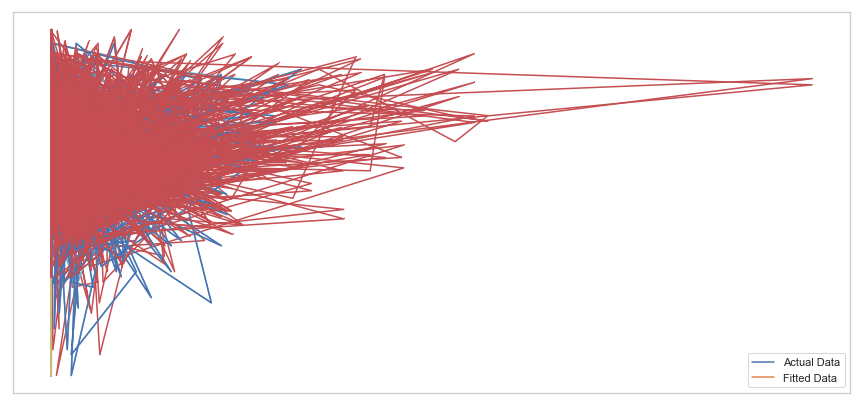

In [73]:
# # Plot outputs
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(X_test_data, y_test)
plt.plot(X_test_data, y_pred , ',r-')

plt.xticks(())
plt.yticks(())
plt.legend(['Actual Data','Fitted Data'],loc='lower right')
plt.show()

Since, the predictor variables are multi-dimensional, its better not have scatter plot visualization, including this above diagram.

### Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [76]:
# Create a based model
rf = RandomForestRegressor()

In [77]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [79]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [80]:
y_pred = grid_search.predict(X_test)

In [81]:
# The mean squared error: (a small MSE is better)
MSE_RF = mean_squared_error(y_test, y_pred)

print("Mean squared error: %.3f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.418


In [82]:
# Explained variance score: 1 is perfect prediction
r2_RF = r2_score(y_test, y_pred)

print('R^2 (coefficient of determination) regression score: %.3f' % r2_score(y_test, y_pred))

R^2 (coefficient of determination) regression score: 0.554


In [83]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

##### Selecting important features

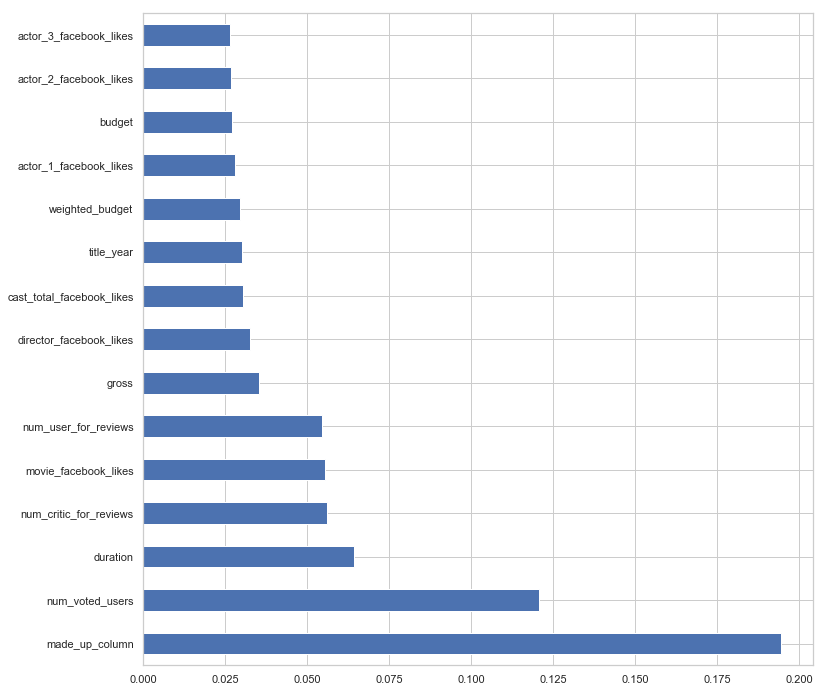

In [84]:
feat_importances = pd.Series(best_grid.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize = (12,12))

### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1234)

In [86]:
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [87]:
#Making models with hyper parameters sets
model = GridSearchCV(dt, param_grid=params, n_jobs=-1, cv=3, verbose =2)

In [88]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 462 candidates, totalling 1386 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1386 out of 1386 | elapsed:    6.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [89]:
#The best hyper parameters set
print("Best Hyper Parameters:",model.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}


In [90]:
#Prediction
y_pred=model.predict(X_test)

In [91]:
# The mean squared error: (a small MSE is better)
MSE_DT = mean_squared_error(y_test, y_pred)

print("Mean squared error: %.3f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.500


In [92]:
# Explained variance score: 1 is perfect prediction
r2_DT = r2_score(y_test, y_pred)

print('R^2 (coefficient of determination) regression score: %.3f' % r2_score(y_test, y_pred))

R^2 (coefficient of determination) regression score: 0.467


In [93]:
best_grid = model.best_estimator_
best_grid

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=11,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

##### Selecting Important features

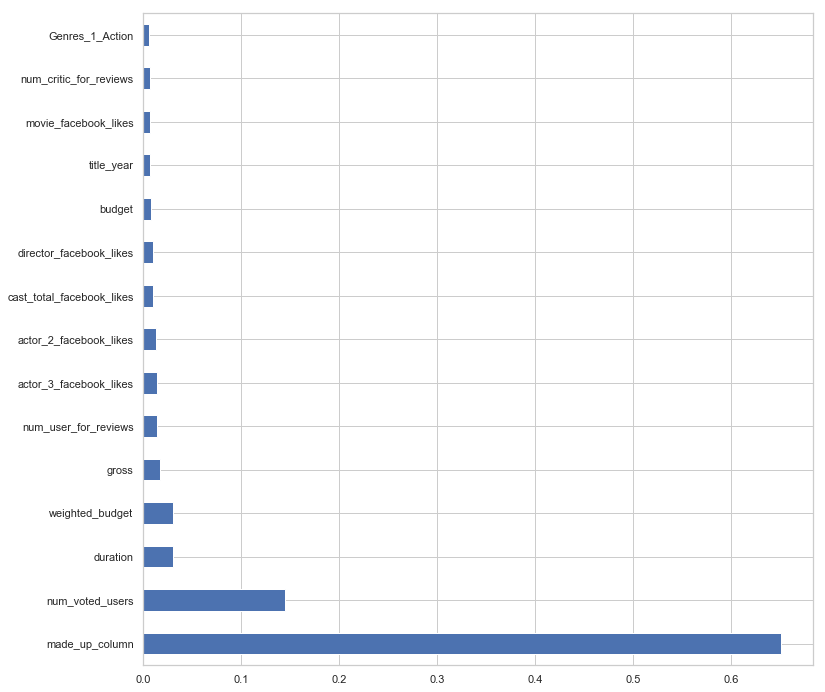

In [94]:
feat_importances = pd.Series(best_grid.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize = (12,12))

### KNN Regression

In [95]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()


In [96]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [97]:
#Making models with hyper parameters sets

knn_model = GridSearchCV(knn, param_grid=params, n_jobs=-1, cv =3, verbose = 2)

In [98]:
#Learning
knn_model.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   26.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'leaf_size': [1, 2, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [99]:
#The best hyper parameters set
print("Best Hyper Parameters:",knn_model.best_params_)

Best Hyper Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


In [100]:
#Prediction
y_pred=knn_model.predict(X_test)

In [101]:
# The mean squared error: (a small MSE is better)
MSE_KNN = mean_squared_error(y_test, y_pred)

print("Mean squared error: %.3f"% mean_squared_error(y_test, y_pred))

Mean squared error: 0.976


In [102]:
# Explained variance score: 1 is perfect prediction
r2_KNN = r2_score(y_test, y_pred)

print('R^2 (coefficient of determination) regression score: %.3f' % r2_score(y_test, y_pred))

R^2 (coefficient of determination) regression score: -0.041


The R2 value can not be negative. R2 value varies from 0 to 1.


In [103]:
best_grid = knn_model.best_estimator_
best_grid

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
          weights='uniform')

### Neural Network

In [104]:
import tensorflow as tf
from tensorflow.python.keras.models import load_model
#from sklearn.metrics import mean_squared_error
import gc; gc.enable()

##### Build the model

In [105]:
# len(X_train.columns)= 58 inputs, 128 neurons in the hidden layer, 1 output

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,  input_dim=len(X_train.columns), activation ='relu', kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(1, activation ='softmax', kernel_initializer = tf.random_normal_initializer)) 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7552      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 40,833
Trainable params: 40,833
Non-trainable params: 0
_________________________________________________________________


In [106]:
layer_input = model.layers[0]
print(layer_input.get_weights()[0].shape)

(58, 128)


###### Compile

In [107]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Instructions for updating:
Use tf.cast instead.


In [108]:
learning_rate = 0.01
epochs_value = 100
batch_size_value = 8

In [109]:
# learning/Training the model

training_model = model.fit(X_train,
                           y_train, 
                           batch_size =batch_size_value, 
                           epochs=epochs_value)
                          #validation_data =(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2963/2963 [==============================] - 1s 195us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 2/100
2963/2963 [==============================] - 0s 125us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 3/100
2963/2963 [==============================] - 0s 126us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 4/100
2963/2963 [==============================] - 0s 150us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 5/100
2963/2963 [==============================] - 0s 130us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 6/100
2963/2963 [==============================] - 0s 132us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 7/100
2963/2963 [==============================] - 0s 130us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 8/100
2963/2963 [==============================] - 0s 134us/sample - loss: 31.0037 - mean_squared_error: 31.0037


2963/2963 [==============================] - 0s 167us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 68/100
2963/2963 [==============================] - 0s 167us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 69/100
2963/2963 [==============================] - 0s 168us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 70/100
2963/2963 [==============================] - 0s 168us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 71/100
2963/2963 [==============================] - 0s 164us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 72/100
2963/2963 [==============================] - 0s 164us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 73/100
2963/2963 [==============================] - 0s 166us/sample - loss: 31.0037 - mean_squared_error: 31.0037
Epoch 74/100
2963/2963 [==============================] - 0s 166us/sample - loss: 31.0037 - mean_squared_error: 31.0037 - loss: 31.1342 - mean_squa
Epoch 75/100
2963/2963 [=

In [110]:
# Make Prediction

predictions = model.predict(X_test)

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: ", rmse)

RMSE:  5.607585955017987


In [112]:
# Explained variance score: 1 is perfect prediction
r2_DL= r2_score(y_test, predictions)

print('R^2 (coefficient of determination) regression score: %.3f' % r2_score(y_test, predictions))

R^2 (coefficient of determination) regression score: -32.536


In [113]:
# The mean squared error: (a small MSE is better)
MSE_DL = mean_squared_error(y_test, predictions)

print("Mean squared error: %.3f"% mean_squared_error(y_test, predictions))

Mean squared error: 31.445


## Lets Document all the models and their corresponding MSE and R2

In [114]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regression', 'Decision Tree Regressor', 'KNN Regression', 'Deep Learning Neural Network'],
    'Mean Squared Error': [MSE_LG ,MSE_RF,  MSE_DT, MSE_KNN, MSE_DL],
    'R2 Score': [r2_LG, r2_RF, r2_DT, r2_KNN, r2_DL]
    }) 
models.sort_values(by='Mean Squared Error', ascending=True)

,Model,Mean Squared Error,R2 Score
0,Linear Regression,0.336371,0.641266
1,Random Forest Regression,0.417813,0.554409
2,Decision Tree Regressor,0.499654,0.467126
3,KNN Regression,0.976487,-0.041408
4,Deep Learning Neural Network,31.445020,-32.535630


## Discussion

Linear Regression turned out to be the best model with minimum Mean Squared Error (MSE) and maximum R-Squared Value.

Also, R-Squared Value always varies between (0,1). However, for this analysis, the r-Squared value for KNN Regression and Deep Learning Neural Network turned to be negative. These values really undermine the outcome for the corresponding models.

Since Linear Regression is the best model, the following variables are the important variables that has the significant effect in the imdb_score.

num_critic_for_reviews, duration, actor_1_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, made_up_column, facenumber_in_poster, num_user_for_reviews, budget, weighted_budget, title_year, actor_2_facebook_likes, movie_facebook_likes, Genres_1_Action, Genres_1_Adventure, Genres_1_Animation, Genres_1_Biography, Genres_1_Comedy, Genres_1_Crime, Genres_1_Documentary, Genres_1_Drama, Genres_1_Family, Genres_1_Fantasy, Genres_1_Horror, Genres_1_Musical, Genres_1_Mystery, Genres_1_Romance, Genres_1_Sci_Fi, Genres_2_Adventure, Genres_2_Animation, Genres_2_Biography, Genres_2_Comedy, Genres_2_Crime, Genres_2_Documentary, Genres_2_Drama, Genres_2_Family, Genres_2_Fantasy, Genres_2_History, Genres_2_Horror, Genres_2_Music, Genres_2_Musical, Genres_2_Mystery, Genres_2_Romance, Genres_2_Sci_Fi, Genres_2_Sport, Genres_2_Thriller, Genres_2_War, Genres_2_Western